In [1]:
import numpy as np
from scipy.stats import poisson
from scipy.stats import dirichlet
from scipy.stats import beta
import matplotlib.pyplot as plt

n=500    #number of particles#
    
s=[]
alpha=np.array([94,3,2,1])

for i in range(0,n):
        sta=[]
        sta.append(np.random.dirichlet(alpha))
        theta=np.ones(6)
        theta[0]=np.random.beta(14,6)
        theta[1]=np.random.beta(2,6)
        theta[2]=np.random.beta(1,6)
        theta[3]=np.random.beta(1,8)
        theta[4]=np.random.beta(1,9)
        theta[5]=np.random.beta(5,1000)
        sta.append(theta)
        sta.append(5)
        s.append(sta)
    
Belief=np.zeros(n)
for i in range(n):
        Belief[i]=dirichlet.pdf(s[i][0],alpha)*beta.pdf(s[i][1][0],14,6)*beta.pdf(s[i][1][1],2,6)*beta.pdf(s[i][1][2],1,6)*beta.pdf(s[i][1][3],1,8)*beta.pdf(s[i][1][4],1,9)*beta.pdf(s[i][1][5],5,1000)
prior=Belief/np.sum(Belief) 

In [2]:
import SAIRS
sair=SAIRS.SAIRS(s,prior)


In [3]:
import POMCP
pomcp=POMCP.POMCP(sair)

In [4]:
T=10
budget=float("inf")
max_play=10
belief=sair.belief
total_rewards=0
particles=s

In [5]:
pomcp.add_configs(budget, belief, simulation_time=120, reinvigorated_particles_ratio=0.1, utility_fn='ucb1', C=0.5)
a=[]
bel=[]
traj=[]
traj.append(sair.curr_state)

for i in range(max_play):
            # plan, take action and receive environment feedbacks
        pomcp.solve(T)
        action = pomcp.get_action(prior)
        a.append(action)
        print(a)
        new_state, obs, reward, cost = pomcp.model.take_action(action)
        state=new_state
        traj.append(new_state)
          # update states
      
        belief = pomcp.update_belief(belief,action, obs)
        bel.append(belief)
        total_rewards += reward
        budget -= cost

[4.0]
[4.0, 0.0]
[4.0, 0.0, 5.0]
[4.0, 0.0, 5.0, 2.0]
[4.0, 0.0, 5.0, 2.0, 3.0]
[4.0, 0.0, 5.0, 2.0, 3.0, 4.0]
[4.0, 0.0, 5.0, 2.0, 3.0, 4.0, 5.0]
[4.0, 0.0, 5.0, 2.0, 3.0, 4.0, 5.0, 0.0]
[4.0, 0.0, 5.0, 2.0, 3.0, 4.0, 5.0, 0.0, 2.0]
[4.0, 0.0, 5.0, 2.0, 3.0, 4.0, 5.0, 0.0, 2.0, 1.0]


In [6]:
a

[4.0, 0.0, 5.0, 2.0, 3.0, 4.0, 5.0, 0.0, 2.0, 1.0]

In [7]:
pomcp.states

[[[array([0.94860295, 0.02551841, 0.0223141 , 0.00356455]),
   array([6.00525809e-01, 2.05005925e-01, 5.12489430e-03, 1.79637018e-04,
          4.37988645e-02, 3.60713720e-03]),
   3.0],
  [array([0.9445079 , 0.02684184, 0.02327918, 0.00537108]),
   array([0.67685789, 0.34145257, 0.16911922, 0.05512917, 0.02460351,
          0.00206279]),
   3.0],
  [array([0.94860295, 0.02551841, 0.0223141 , 0.00356455]),
   array([6.00525809e-01, 2.05005925e-01, 5.12489430e-03, 1.79637018e-04,
          4.37988645e-02, 3.60713720e-03]),
   3.0],
  [array([0.93128433, 0.03453235, 0.02344856, 0.01073477]),
   array([0.64114891, 0.32047209, 0.12406256, 0.00846733, 0.07337778,
          0.0032297 ]),
   3.0],
  [array([0.96883833, 0.02086109, 0.00715117, 0.00314941]),
   array([0.58156741, 0.20044977, 0.07795739, 0.13891288, 0.1047869 ,
          0.00651262]),
   3.0],
  [array([0.95650729, 0.0254249 , 0.01512931, 0.00293851]),
   array([0.66954751, 0.26218564, 0.22173153, 0.05215068, 0.02238195,
       

In [8]:
total_rewards


-61.845928040013256

In [9]:
traj

[[array([0.95080296, 0.02289586, 0.02167903, 0.00462216]),
  array([0.70782483, 0.2397945 , 0.21468321, 0.01261959, 0.01423445,
         0.00383522]),
  5],
 [array([0.94065773, 0.02484818, 0.02929016, 0.00520392]),
  array([0.70782483, 0.2397945 , 0.21468321, 0.01261959, 0.01423445,
         0.00383522]),
  3.0],
 [array([0.928466  , 0.02780373, 0.03782297, 0.0059073 ]),
  array([0.70782483, 0.2397945 , 0.21468321, 0.01261959, 0.01423445,
         0.00383522]),
  5.0],
 [array([0.91387746, 0.03178114, 0.04758369, 0.00675772]),
  array([0.70782483, 0.2397945 , 0.21468321, 0.01261959, 0.01423445,
         0.00383522]),
  4.0],
 [array([0.89651114, 0.03681652, 0.05888766, 0.00778468]),
  array([0.70782483, 0.2397945 , 0.21468321, 0.01261959, 0.01423445,
         0.00383522]),
  3.0],
 [array([0.87596666, 0.0429516 , 0.07205972, 0.00902202]),
  array([0.70782483, 0.2397945 , 0.21468321, 0.01261959, 0.01423445,
         0.00383522]),
  4.0],
 [array([0.85184291, 0.0502191 , 0.08742981, 0.0

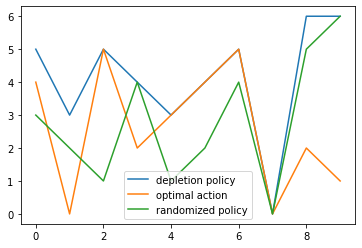

In [16]:
a_stock=[]
for i in range(T):
    a_stock.append(traj[i][2])

a_random=[]
for i in range(10):
    choices=np.linspace(0,int(a_stock[i]),int(a_stock[i])+1)
    a_random.append(np.random.choice(choices))  #a sequence of randomly chosen actions
    
x=np.linspace(0,9,10)
plt.plot(x,a_stock)
plt.plot(x,a)
plt.plot(x,a_random)
plt.legend(["depletion policy", "optimal action","randomized policy"])



In [21]:
#depletion policy
sair_d=SAIRS.SAIRS(s,prior)
traj_d=[]
bel_d=[]

aver_reward=0
for j in range(50):
    total_rewards=0
    for i in range(max_play):
        action=sair_d.curr_state[2]
        #print(action)
        new_state, obs, reward, cost =sair_d.take_action(action)
        traj_d.append(new_state)
        bel_d.append(sair_d.belief)
        total_rewards += reward
    #print(total_rewards)
    aver_reward+=total_rewards

#average reward for depletion
print(aver_reward/50)




-62.126384262854714


In [22]:
#depletion policy
sair_r=SAIRS.SAIRS(s,prior)
traj_r=[]
bel_r=[]

aver_reward=0
for j in range(50):
    total_rewards=0
    for i in range(max_play):
        action=sair_r.curr_state[2]
        cho=np.linspace(0,int(action),int(action)+1)
        a_random=np.random.choice(cho)
        #print(a_random)
        new_state, obs, reward, cost = sair_r.take_action(a_random)
        state=new_state
        traj_r.append(new_state)
        bel_r.append(sair_r.belief)
        total_rewards += reward
    #print(total_rewards)
    aver_reward+=total_rewards

#average reward for depletion
print(aver_reward/50)

-62.13463194137017
